In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

In [2]:
df=pd.read_excel('employee.xlsx')

In [3]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.drop(columns=['EmployeeCount','StandardHours','Over18','DistanceFromHome','EmployeeNumber'],inplace=True)

In [6]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0}) 

In [41]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [10]:
print(categorical_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [11]:
print(numerical_cols)

['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [18]:
'''numerical_df = X_train.select_dtypes(include=['number'])
n_cols = len(numerical_df.columns)
n_rows = (n_cols + 1) // 2
fig, axes = plt.subplots(nrows=n_rows, ncols=min(2, n_cols), figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_df.columns):
    sns.boxplot(data=numerical_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()'''

"numerical_df = X_train.select_dtypes(include=['number'])\nn_cols = len(numerical_df.columns)\nn_rows = (n_cols + 1) // 2\nfig, axes = plt.subplots(nrows=n_rows, ncols=min(2, n_cols), figsize=(12, 5 * n_rows))\naxes = axes.flatten()\n\nfor i, col in enumerate(numerical_df.columns):\n    sns.boxplot(data=numerical_df, x=col, ax=axes[i])\n    axes[i].set_title(f'Distribution of {col}')\n\nplt.tight_layout()\nplt.show()"

In [19]:
'''numerical_df = X_train.select_dtypes(include=['number'])
n_cols = len(numerical_df.columns)
n_rows = (n_cols + 1) // 2
fig, axes = plt.subplots(nrows=n_rows, ncols=min(2, n_cols), figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_df.columns):
    sns.histplot(data=numerical_df, x=col,kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()'''

"numerical_df = X_train.select_dtypes(include=['number'])\nn_cols = len(numerical_df.columns)\nn_rows = (n_cols + 1) // 2\nfig, axes = plt.subplots(nrows=n_rows, ncols=min(2, n_cols), figsize=(12, 5 * n_rows))\naxes = axes.flatten()\n\nfor i, col in enumerate(numerical_df.columns):\n    sns.histplot(data=numerical_df, x=col,kde=True, ax=axes[i])\n    axes[i].set_title(f'Distribution of {col}')\n\nplt.tight_layout()\nplt.show()"

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1194 to 1292
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   Education                 1176 non-null   int64 
 5   EducationField            1176 non-null   object
 6   EnvironmentSatisfaction   1176 non-null   int64 
 7   Gender                    1176 non-null   object
 8   HourlyRate                1176 non-null   int64 
 9   JobInvolvement            1176 non-null   int64 
 10  JobLevel                  1176 non-null   int64 
 11  JobRole                   1176 non-null   object
 12  JobSatisfaction           1176 non-null   int64 
 13  MaritalStatus             1176 non-null   object
 14  MonthlyIncome             

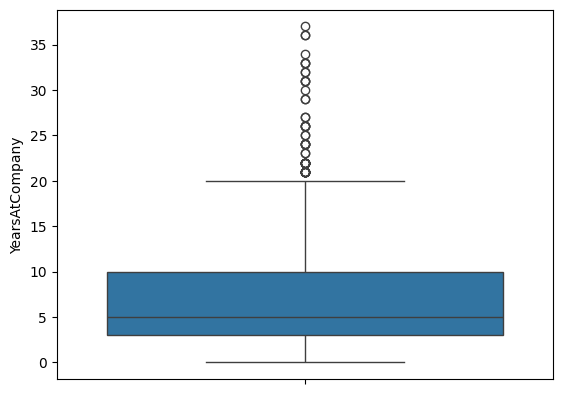

In [21]:
sns.boxplot(X_train['YearsAtCompany'])
plt.show()

In [22]:
per25=df['YearsAtCompany'].quantile(0.25)
per75=df['YearsAtCompany'].quantile(0.75)

In [23]:
iqr=per75-per25
iqr

np.float64(6.0)

In [24]:
upper_limit=per75+1.5*iqr
lower_limit=per25-1.5*iqr

In [25]:
print(upper_limit,lower_limit)

18.0 -6.0


In [40]:
new_df_cap=df[df['YearsAtCompany']>upper_limit]

In [27]:
df[df['YearsAtCompany']<lower_limit]

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [37]:
df[df['YearsAtCompany']<upper_limit]

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [39]:
new_df_cap=df.copy()

new_df_cap['YearsAtCompany']=np.where(
    new_df_cap['YearsAtCompany']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['YearsAtCompany']<lower_limit,
        lower_limit,
        new_df_cap['YearsAtCompany']
    )
)

In [38]:
new_df_cap.shape

(1470, 30)

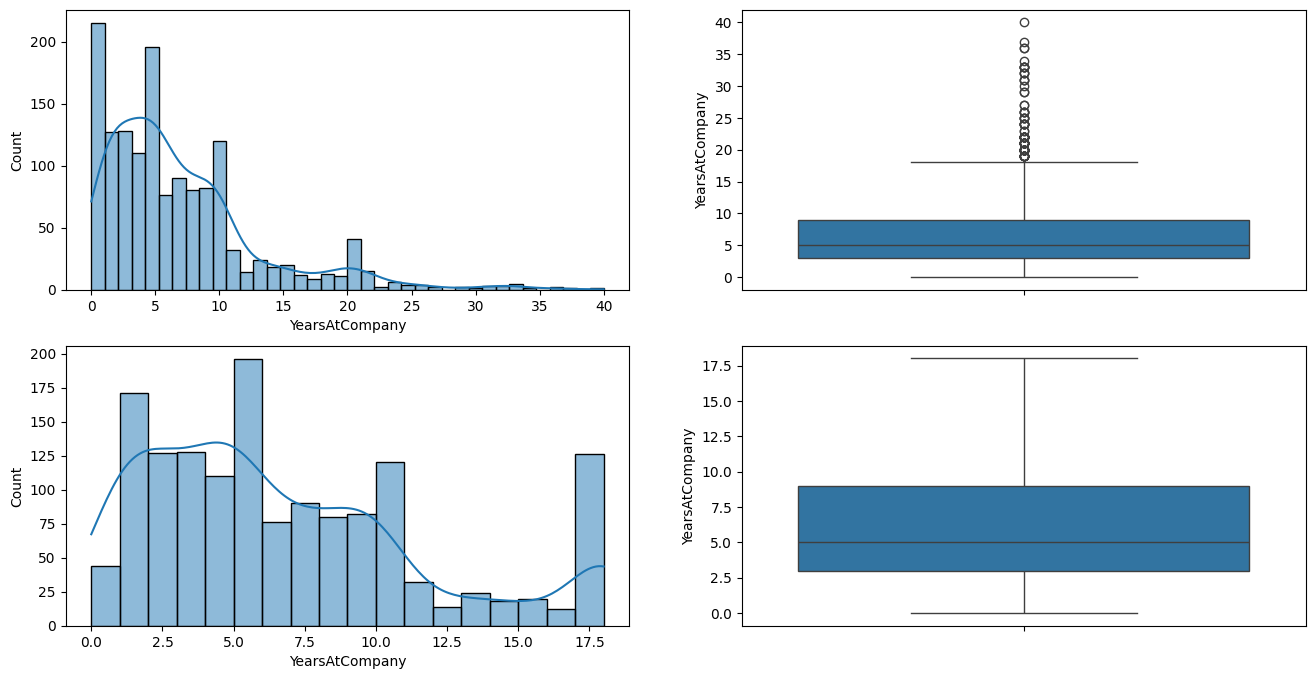

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['YearsAtCompany'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['YearsAtCompany'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['YearsAtCompany'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['YearsAtCompany'])

plt.show()

In [71]:
def scanning(numerical_cols, df):

    outlier_cols = []
    for i in numerical_cols:
        per25 = df[i].quantile(0.25)
        per75 = df[i].quantile(0.75)
        iqr = per75 - per25
        
        lower_limit = per25 - (1.5 * iqr)
        upper_limit = per75 + (1.5 * iqr)
        
        outlier_count = len(df[(df[i] > upper_limit) | (df[i] < lower_limit)])
        
        if outlier_count > 0:
            print(f"Column '{i}': Found {outlier_count} outlier(s).")
            outlier_cols.append(i)
        else:
            print(f"Column '{i}': No outliers found.")
    
    return outlier_cols

def outliers(columns_to_plot, df):
   
    if not columns_to_plot:
        print("No columns with outliers to plot.")
        return

    
    
    for i in columns_to_plot:
        
        per25 = df[i].quantile(0.25)
        per75 = df[i].quantile(0.75)
        iqr = per75 - per25
        lower_limit = per25 - (1.5 * iqr)
        upper_limit = per75 + (1.5 * iqr)
        
       
        df[i] = np.where(
            df[i] > upper_limit,
            upper_limit,
            np.where(
                df[i] < lower_limit,
                lower_limit,
                df[i]
            )
        )
        
        

In [72]:
val=scanning(numerical_cols,df)

Column 'Age': No outliers found.
Column 'DailyRate': No outliers found.
Column 'Education': No outliers found.
Column 'EnvironmentSatisfaction': No outliers found.
Column 'HourlyRate': No outliers found.
Column 'JobInvolvement': No outliers found.
Column 'JobLevel': No outliers found.
Column 'JobSatisfaction': No outliers found.
Column 'MonthlyIncome': No outliers found.
Column 'MonthlyRate': No outliers found.
Column 'NumCompaniesWorked': No outliers found.
Column 'PercentSalaryHike': No outliers found.
Column 'PerformanceRating': No outliers found.
Column 'RelationshipSatisfaction': No outliers found.
Column 'StockOptionLevel': No outliers found.
Column 'TotalWorkingYears': No outliers found.
Column 'TrainingTimesLastYear': No outliers found.
Column 'WorkLifeBalance': No outliers found.
Column 'YearsAtCompany': No outliers found.
Column 'YearsInCurrentRole': No outliers found.
Column 'YearsSinceLastPromotion': No outliers found.
Column 'YearsWithCurrManager': No outliers found.


In [73]:
outliers(val,df)

No columns with outliers to plot.


In [94]:
preprocessor = ColumnTransformer(
    transformers=[
       
        ('ohe', 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         categorical_cols),
        
        
        ('function', 
         MinMaxScaler(), 
         numerical_cols),


        
    ],
    remainder='passthrough' )

In [95]:
model = LogisticRegression(solver='liblinear', random_state=42) 

In [96]:
pipe = make_pipeline(preprocessor, model)

In [97]:
pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe', ...), ('function', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [98]:
y_pred=pipe.predict(X_test)

In [99]:
print(accuracy_score(y_pred,y_test))

0.8775510204081632
